In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import sklearn
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


In [4]:
df.shape

(50000, 19)

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [6]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [7]:
df.sample(20)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
35832,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930687e+09,2020-03-23,20200323,20200323,20200407.0,USD,RV,1.0,NaN,33988.59,20200323.0,NAH4,1.930687e+09,1
33487,U001,0200455322,PEA systems,2019-08-15 00:00:00,2019.0,1.929602e+09,2019-07-12,20190710,20190712,20190811.0,USD,RV,1.0,NaN,17602.16,20190712.0,NAD5,1.929602e+09,0
37928,U001,0200769623,WAL-MAR trust,2019-01-15 00:00:00,2019.0,1.928559e+09,2019-01-04,20190103,20190104,20190119.0,USD,RV,1.0,NaN,445.49,20190104.0,NAH4,1.928559e+09,0
35775,U001,0200726979,BJ'S us,2019-12-30 00:00:00,2019.0,1.930225e+09,2019-12-06,20191206,20191206,20191221.0,USD,RV,1.0,NaN,34174.57,20191206.0,NAA8,1.930225e+09,0
14413,U001,0200772670,ASSOCIAT co,2019-02-06 00:00:00,2019.0,1.928660e+09,2019-01-22,20190122,20190122,20190206.0,USD,RV,1.0,NaN,61010.02,20190122.0,NAU5,1.928660e+09,0
38583,U001,0200126819,MCLANE llc,2019-08-14 00:00:00,2019.0,1.929675e+09,2019-07-31,20190729,20190731,20190815.0,USD,RV,1.0,NaN,24956.73,20190731.0,NAA8,1.929675e+09,0
19610,U001,0200794332,COST llc,2020-01-22 00:00:00,2020.0,1.930372e+09,2020-01-08,20200108,20200108,20200123.0,USD,RV,1.0,NaN,63829.79,20200108.0,NAAX,1.930372e+09,0
44596,U001,0200739006,AL systems,2019-07-25 00:00:00,2019.0,1.929580e+09,2019-07-11,20190705,20190711,20190726.0,USD,RV,1.0,NaN,6720.96,20190711.0,NAA8,1.929580e+09,0
43378,U001,0100031704,DELHAIZE trust,2019-06-11 00:00:00,2019.0,1.929371e+09,2019-05-23,20190523,20190523,20190607.0,USD,RV,1.0,NaN,664.25,20190523.0,NAA8,1.929371e+09,0
27680,U013,0100009932,SYSCO IN associates,2019-05-23 00:00:00,2019.0,1.991826e+09,2019-04-22,20190422,20190422,20190522.0,USD,RV,1.0,NaN,54199.60,20190422.0,NAVE,1.991826e+09,0


# DATA PREPROCESSING

check presence of null data

NULL IMPUTATION

In [8]:
[col for col in df.columns if df[col].isnull().sum() > 0]

['clear_date', 'area_business', 'invoice_id']

In [9]:
# we can quantify the total number of missing values using
# the isnull method plus the sum method on the dataframe
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [10]:
# alternatively, we can use the mean method after isnull
# to visualise the percentage of
# missing values for each variable
df.isnull().mean()

business_code             0.00000
cust_number               0.00000
name_customer             0.00000
clear_date                0.20000
buisness_year             0.00000
doc_id                    0.00000
posting_date              0.00000
document_create_date      0.00000
document_create_date.1    0.00000
due_in_date               0.00000
invoice_currency          0.00000
document type             0.00000
posting_id                0.00000
area_business             1.00000
total_open_amount         0.00000
baseline_create_date      0.00000
cust_payment_terms        0.00000
invoice_id                0.00012
isOpen                    0.00000
dtype: float64

In [11]:
# MCAR 
df=df.drop(['area_business'],axis=1)

In [12]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,63.48,20191127.0,NAA8,1.930199e+09,0


In [13]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [14]:
df.shape

(50000, 18)

In [15]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [16]:
# taking non-null clear_date value for train set and null value of test set
main_train=df[df.clear_date.isnull()==False]
main_test=df[df.clear_date.isnull()]

In [17]:
main_train.sample(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
32834,U001,0200761734,H E BUT in,2019-08-16 00:00:00,2019.0,1.929682e+09,2019-08-04,20190803,20190804,20190819.0,USD,RV,1.0,13848.10,20190804.0,NAA8,1.929682e+09,0
30872,U001,0200726979,BJ'S in,2019-07-30 00:00:00,2019.0,1.929617e+09,2019-07-15,20190715,20190715,20190730.0,USD,RV,1.0,121.58,20190715.0,NAA8,1.929617e+09,0
24300,U001,0200769623,WAL-MAR corporation,2019-12-24 00:00:00,2019.0,1.930277e+09,2019-12-13,20191213,20191213,20191228.0,USD,RV,1.0,678.27,20191213.0,NAH4,1.930277e+09,0
5592,U001,0200752302,KROGER in,2019-10-21 00:00:00,2019.0,1.929951e+09,2019-10-04,20191002,20191004,20191019.0,USD,RV,1.0,76764.72,20191004.0,NAA8,1.929951e+09,0
16029,U001,CCCA02,KRAFT associates,2019-11-01 00:00:00,2019.0,1.929927e+09,2019-09-26,20190925,20190926,20191031.0,USD,RV,1.0,14832.80,20190926.0,NAG2,1.929927e+09,0
19012,U001,0200833713,JETRO foundation,2019-07-02 00:00:00,2019.0,1.929483e+09,2019-06-12,20190612,20190612,20190627.0,USD,RV,1.0,443.55,20190612.0,NAA8,1.929483e+09,0
33190,U001,0200132251,SUPERB systems,2019-01-15 00:00:00,2019.0,1.928540e+09,2018-12-31,20181229,20181231,20190115.0,USD,RV,1.0,13506.60,20181231.0,NAA8,1.928540e+09,0
31699,U001,0200769623,WAL-MAR trust,2020-01-24 00:00:00,2020.0,1.930395e+09,2020-01-14,20200113,20200114,20200129.0,USD,RV,1.0,46304.87,20200114.0,NAH4,1.930395e+09,0
47986,U001,0200704858,WAKE llc,2019-03-14 00:00:00,2019.0,1.928864e+09,2019-02-27,20190226,20190227,20190314.0,USD,RV,1.0,42853.24,20190227.0,NAA8,1.928864e+09,0
30673,U001,0200769623,WAL-MAR co,2019-01-15 00:00:00,2019.0,1.928565e+09,2019-01-05,20190103,20190105,20190120.0,USD,RV,1.0,16421.04,20190105.0,NAH4,1.928565e+09,0


In [18]:
main_test.sample(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45068,U002,0200978592,PLAZA associates,NaN,2020.0,1.990573e+09,2020-05-01,20200501,20200501,20200605.0,USD,RV,1.0,35.05,20200501.0,NAG2,1.990573e+09,1
20943,U001,0200726979,BJ'S,NaN,2020.0,1.930857e+09,2020-05-05,20200504,20200505,20200520.0,USD,RV,1.0,380.77,20200505.0,NAA8,1.930857e+09,1
42378,U001,0200331749,SYSC llc,NaN,2020.0,1.930833e+09,2020-04-28,20200428,20200428,20200518.0,USD,RV,1.0,5613.04,20200428.0,NAD1,1.930833e+09,1
23256,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930783e+09,2020-04-15,20200414,20200415,20200430.0,USD,RV,1.0,65731.10,20200415.0,NAH4,1.930783e+09,1
35940,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930620e+09,2020-03-08,20200307,20200308,20200323.0,USD,RV,1.0,7195.24,20200308.0,NAH4,1.930620e+09,1
17509,U001,0100031704,DELHAIZE trust,NaN,2020.0,1.930639e+09,2020-03-12,20200311,20200312,20200327.0,USD,RV,1.0,110889.79,20200312.0,NAA8,1.930639e+09,1
27783,U001,0200769623,WAL-MAR,NaN,2020.0,1.930848e+09,2020-05-02,20200501,20200502,20200517.0,USD,RV,1.0,13481.60,20200502.0,NAH4,1.930848e+09,1
9426,U001,0200759878,SA associates,NaN,2020.0,1.930580e+09,2020-02-28,20200227,20200228,20200503.0,USD,RV,1.0,6303.00,20200228.0,NAGD,1.930580e+09,1
46052,U001,0200718130,SYSCO F systems,NaN,2020.0,1.930638e+09,2020-03-17,20200311,20200317,20200406.0,USD,RV,1.0,368.65,20200317.0,NAD1,1.930638e+09,1
15262,CA02,0100030194,AMAZO co,NaN,2020.0,2.960628e+09,2020-04-15,20200415,20200415,20200427.0,CAD,RV,1.0,913.10,20200417.0,CA10,2.960628e+09,1


In [19]:
main_train.shape

(40000, 18)

In [20]:
main_test.shape

(10000, 18)

In [21]:
main_train.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                6
isOpen                    0
dtype: int64

In [22]:
main_train['invoice_id'].isna().sum()

6

In [23]:
main_train=main_train.dropna(subset=['invoice_id'])

In [24]:
main_train.shape

(39994, 18)

# CONSTANT,DUPLICATE,QUASI-CONSTANT

In [25]:
main_train.drop_duplicates(keep=False,inplace=True)

In [26]:
main_train.shape

(38319, 18)

In [27]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38319 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           38319 non-null  object 
 1   cust_number             38319 non-null  object 
 2   name_customer           38319 non-null  object 
 3   clear_date              38319 non-null  object 
 4   buisness_year           38319 non-null  float64
 5   doc_id                  38319 non-null  float64
 6   posting_date            38319 non-null  object 
 7   document_create_date    38319 non-null  int64  
 8   document_create_date.1  38319 non-null  int64  
 9   due_in_date             38319 non-null  float64
 10  invoice_currency        38319 non-null  object 
 11  document type           38319 non-null  object 
 12  posting_id              38319 non-null  float64
 13  total_open_amount       38319 non-null  float64
 14  baseline_create_date    38319 non-null

In [28]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,2253.86,20190914.0,NAA8,1.929874e+09,0
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,33133.29,20191113.0,NAH4,1.930148e+09,0
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,1.0,22225.84,20190924.0,CA10,2.960581e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25 00:00:00,2019.0,1.929601e+09,2019-07-10,20190709,20190710,20190725.0,USD,RV,1.0,84780.40,20190710.0,NAC6,1.929601e+09,0
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,63.48,20191127.0,NAA8,1.930199e+09,0


In [29]:
# its showing constant value 
main_train['isOpen'].value_counts()

0    38319
Name: isOpen, dtype: int64

In [30]:
# dropping as it has constant value
main_train=main_train.drop(['isOpen',],axis=1)

In [31]:
main_train.shape

(38319, 17)

In [32]:
# its showing constant value 
main_train['posting_id'].value_counts()

1.0    38319
Name: posting_id, dtype: int64

In [33]:
# dropping as it has constant value
main_train=main_train.drop(['posting_id'],axis=1)

In [34]:
main_train.shape

(38319, 16)

In [35]:
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,54273.28,20200126.0,NAH4,1.930438e+09
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,79656.60,20190722.0,NAD1,1.929646e+09
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,2253.86,20190914.0,NAA8,1.929874e+09
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,33133.29,20191113.0,NAH4,1.930148e+09
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,22225.84,20190924.0,CA10,2.960581e+09


In [36]:
main_train['baseline_create_date'].dtypes

dtype('float64')

In [37]:
main_train['document_create_date.1'].dtypes

dtype('int64')

In [38]:
# converting int64 to float64 datatype
main_train['document_create_date.1']=main_train['document_create_date.1'].astype(float)

In [39]:
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126.0,20200210.0,USD,RV,54273.28,20200126.0,NAH4,1.930438e+09
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722.0,20190811.0,USD,RV,79656.60,20190722.0,NAD1,1.929646e+09
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914.0,20190929.0,USD,RV,2253.86,20190914.0,NAA8,1.929874e+09
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113.0,20191128.0,USD,RV,33133.29,20191113.0,NAH4,1.930148e+09
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920.0,20191004.0,CAD,RV,22225.84,20190924.0,CA10,2.960581e+09


In [40]:
main_train=main_train.T

In [41]:
main_train[main_train.duplicated()]

,0,1,2,4,5,6,8,9,11,12,...,49985,49987,49988,49989,49993,49994,49996,49997,49998,49999
invoice_id,1930438491.0,1929646410.0,1929873765.0,1930147974.0,2960581231.0,1930083373.0,1929439637.0,1928819386.0,1928550622.0,1929151655.0,...,1929241927.0,1929686954.0,1929853889.0,1930542361.0,1930377837.0,1929600989.0,1929744070.0,1930536775.0,1930198546.0,1928576325.0


In [42]:
main_train

,0,1,2,4,5,6,8,9,11,12,...,49985,49987,49988,49989,49993,49994,49996,49997,49998,49999
business_code,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,...,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001
cust_number,0200769623,0200980828,0200792734,0200769623,0140106181,0200769623,0200769623,0200762301,0200743129,0200186937,...,0200769623,0200732755,0200726979,0200772670,0200726979,0200762301,0200769623,0200772595,0200726979,0200020431
name_customer,WAL-MAR corp,BEN E,MDV/ trust,WAL-MAR foundation,THE corporation,WAL-MAR in,WAL-MAR corp,C&S WH systems,BROOKS co,SYSC corporation,...,WAL-MAR in,KROGER corporation,BJ'S llc,ASSOCIAT us,BJ'S,C&S WH trust,WAL-MAR co,SAFEW associates,BJ'S llc,DEC corp
clear_date,2020-02-11 00:00:00,2019-08-08 00:00:00,2019-12-30 00:00:00,2019-11-25 00:00:00,2019-12-04 00:00:00,2019-11-12 00:00:00,2019-06-18 00:00:00,2019-03-06 00:00:00,2019-01-22 00:00:00,2019-05-06 00:00:00,...,2019-05-13 00:00:00,2019-08-19 00:00:00,2019-09-26 00:00:00,2020-03-05 00:00:00,2020-03-25 00:00:00,2019-07-25 00:00:00,2019-09-03 00:00:00,2020-03-05 00:00:00,2019-12-12 00:00:00,2019-01-15 00:00:00
buisness_year,2020.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,...,2019.0,2019.0,2019.0,2020.0,2020.0,2019.0,2019.0,2020.0,2019.0,2019.0
doc_id,1930438491.0,1929646410.0,1929873765.0,1930147974.0,2960581231.0,1930083373.0,1929439637.0,1928819386.0,1928550622.0,1929151655.0,...,1929241927.0,1929686954.0,1929853889.0,1930542361.0,1930377837.0,1929600989.0,1929744070.0,1930536775.0,1930198546.0,1928576325.0
posting_date,2020-01-26,2019-07-22,2019-09-14,2019-11-13,2019-09-20,2019-11-01,2019-06-07,2019-02-20,2019-01-02,2019-04-15,...,2019-05-02,2019-08-02,2019-09-10,2020-02-18,2020-01-08,2019-07-10,2019-08-15,2020-02-19,2019-11-27,2019-01-05
document_create_date,20200125,20190722,20190914,20191113,20190920,20191031,20190605,20190219,20190102,20190415,...,20190501,20190801,20190909,20200219,20200108,20190709,20190814,20200218,20191126,20190105
document_create_date.1,20200126.0,20190722.0,20190914.0,20191113.0,20190920.0,20191101.0,20190607.0,20190220.0,20190102.0,20190415.0,...,20190502.0,20190802.0,20190910.0,20200218.0,20200108.0,20190710.0,20190815.0,20200219.0,20191127.0,20190105.0
due_in_date,20200210.0,20190811.0,20190929.0,20191128.0,20191004.0,20191116.0,20190622.0,20190307.0,20190117.0,20190430.0,...,20190517.0,20190817.0,20190925.0,20200304.0,20200123.0,20190725.0,20190830.0,20200305.0,20191212.0,20190124.0


In [43]:
main_train=main_train.T

In [44]:
# we have document_create_date which has high priority and samne value as baseline_create_date and document_create_date.1
main_train=main_train.drop(['baseline_create_date','document_create_date.1'],axis=1)

In [45]:
main_train.sample(40)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,invoice_id
6068,U001,0200769623,WAL-MAR associates,2019-05-22 00:00:00,2019.0,1929300817.0,2019-05-12,20190511,20190527.0,USD,RV,5764.54,NAH4,1929300817.0
34789,U001,0200705742,DOT systems,2019-09-13 00:00:00,2019.0,1929725372.0,2019-08-12,20190809,20190913.0,USD,RV,67321.54,NA32,1929725372.0
31033,U001,0200769623,WAL-MAR systems,2019-09-09 00:00:00,2019.0,1929798801.0,2019-08-27,20190827,20190911.0,USD,RV,54941.65,NAH4,1929798801.0
35860,U001,0200705089,JETR associates,2020-03-11 00:00:00,2020.0,1930564939.0,2020-02-25,20200224,20200311.0,USD,RV,19305.14,NAA8,1930564939.0
40082,U001,0200761734,H E BUT llc,2019-07-26 00:00:00,2019.0,1929612425.0,2019-07-12,20190712,20190727.0,USD,RV,75000.03,NAA8,1929612425.0
8239,U001,0200761734,H E BUT corp,2020-02-06 00:00:00,2020.0,1930414605.0,2020-01-22,20200120,20200206.0,USD,RV,18336.95,NAA8,1930414605.0
10039,U001,0200769623,WAL-MAR llc,2019-04-15 00:00:00,2019.0,1929047035.0,2019-03-29,20190328,20190413.0,USD,RV,1126.41,NAH4,1929047035.0
3971,U001,200126819,MCLANE corp,2019-02-13 00:00:00,2019.0,1928688816.0,2019-01-29,20190126,20190213.0,USD,RV,4528.2,NAA8,1928688816.0
2652,U001,0200126819,MCLANE corporation,2020-01-31 00:00:00,2020.0,1930395164.0,2020-01-15,20200113,20200130.0,USD,RV,18193.91,NAA8,1930395164.0
15182,CA02,0140105847,GORDON F associates,2019-02-25 00:00:00,2019.0,2960527286.0,2019-02-07,20190207,20190218.0,CAD,RV,496.0,CA10,2960527286.0


In [46]:
# i've dropped business year as it can be again extracted from the clear_date
main_train=main_train.drop(['buisness_year'],axis=1)

In [47]:
main_train.tail()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,invoice_id
49994,U001,0200762301,C&S WH trust,2019-07-25 00:00:00,1929600989.0,2019-07-10,20190709,20190725.0,USD,RV,84780.4,NAC6,1929600989.0
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,1929744070.0,2019-08-15,20190814,20190830.0,USD,RV,6766.54,NAH4,1929744070.0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,1930536775.0,2020-02-19,20200218,20200305.0,USD,RV,6120.86,NAA8,1930536775.0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,1930198546.0,2019-11-27,20191126,20191212.0,USD,RV,63.48,NAA8,1930198546.0
49999,U001,0200020431,DEC corp,2019-01-15 00:00:00,1928576325.0,2019-01-05,20190105,20190124.0,USD,RV,1790.3,NAM4,1928576325.0


In [48]:
# constant value
main_train['document type'].value_counts()

RV    38319
Name: document type, dtype: int64

In [49]:
# dropping of constant column
main_train=main_train.drop(['document type'],axis=1)

In [50]:
main_train.sample(3)

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
19297,U001,0200705742,DOT co,2020-03-06 00:00:00,1930546707.0,2020-02-20,20200219,20200311.0,USD,14588.79,NAD1,1930546707.0
45649,U001,0200742791,QUI us,2019-08-19 00:00:00,1929697330.0,2019-08-06,20190803,20190821.0,USD,49431.6,NAA8,1929697330.0
48172,U001,0200782001,GORDO us,2019-01-15 00:00:00,1928551081.0,2019-01-02,20190102,20190117.0,USD,36342.31,NAA8,1928551081.0


In [51]:
main_train.shape

(38319, 12)

In [52]:
# checking if they are duplicate column
main_train['doc_id']==main_train['invoice_id']

0        True
1        True
2        True
4        True
5        True
         ... 
49994    True
49996    True
49997    True
49998    True
49999    True
Length: 38319, dtype: bool

In [53]:
# dropping of invoice_id as it is duplicate of doc_id
main_train=main_train.drop(['invoice_id'],axis=1)

In [54]:
main_train.shape

(38319, 11)

In [55]:
main_train.head(12)

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,1930438491.0,2020-01-26,20200125,20200210.0,USD,54273.28,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,1929646410.0,2019-07-22,20190722,20190811.0,USD,79656.6,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,1929873765.0,2019-09-14,20190914,20190929.0,USD,2253.86,NAA8
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,1930147974.0,2019-11-13,20191113,20191128.0,USD,33133.29,NAH4
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2960581231.0,2019-09-20,20190920,20191004.0,CAD,22225.84,CA10
6,U001,0200769623,WAL-MAR in,2019-11-12 00:00:00,1930083373.0,2019-11-01,20191031,20191116.0,USD,7358.49,NAH4
8,U001,0200769623,WAL-MAR corp,2019-06-18 00:00:00,1929439637.0,2019-06-07,20190605,20190622.0,USD,15995.04,NAH4
9,U001,0200762301,C&S WH systems,2019-03-06 00:00:00,1928819386.0,2019-02-20,20190219,20190307.0,USD,28.63,NAC6
11,U001,0200743129,BROOKS co,2019-01-22 00:00:00,1928550622.0,2019-01-02,20190102,20190117.0,USD,103147.37,NAA8
12,U001,0200186937,SYSC corporation,2019-05-06 00:00:00,1929151655.0,2019-04-15,20190415,20190430.0,USD,16381.45,NAA8


In [56]:
main_train['clear_date']=pd.to_datetime(main_train['clear_date'])

In [57]:
main_train['posting_date']=pd.to_datetime(main_train['posting_date'])

In [58]:
main_train

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,1930438491.0,2020-01-26,20200125,20200210.0,USD,54273.28,NAH4
1,U001,0200980828,BEN E,2019-08-08,1929646410.0,2019-07-22,20190722,20190811.0,USD,79656.6,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,1929873765.0,2019-09-14,20190914,20190929.0,USD,2253.86,NAA8
4,U001,0200769623,WAL-MAR foundation,2019-11-25,1930147974.0,2019-11-13,20191113,20191128.0,USD,33133.29,NAH4
5,CA02,0140106181,THE corporation,2019-12-04,2960581231.0,2019-09-20,20190920,20191004.0,CAD,22225.84,CA10
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,1929600989.0,2019-07-10,20190709,20190725.0,USD,84780.4,NAC6
49996,U001,0200769623,WAL-MAR co,2019-09-03,1929744070.0,2019-08-15,20190814,20190830.0,USD,6766.54,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05,1930536775.0,2020-02-19,20200218,20200305.0,USD,6120.86,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12,1930198546.0,2019-11-27,20191126,20191212.0,USD,63.48,NAA8


In [59]:
main_train['document_create_date']=main_train['document_create_date'].astype(str)

In [60]:
main_train['document_create_date']=pd.to_datetime(main_train['document_create_date'])

In [61]:
main_train

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,1930438491.0,2020-01-26,2020-01-25,20200210.0,USD,54273.28,NAH4
1,U001,0200980828,BEN E,2019-08-08,1929646410.0,2019-07-22,2019-07-22,20190811.0,USD,79656.6,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,1929873765.0,2019-09-14,2019-09-14,20190929.0,USD,2253.86,NAA8
4,U001,0200769623,WAL-MAR foundation,2019-11-25,1930147974.0,2019-11-13,2019-11-13,20191128.0,USD,33133.29,NAH4
5,CA02,0140106181,THE corporation,2019-12-04,2960581231.0,2019-09-20,2019-09-20,20191004.0,CAD,22225.84,CA10
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,1929600989.0,2019-07-10,2019-07-09,20190725.0,USD,84780.4,NAC6
49996,U001,0200769623,WAL-MAR co,2019-09-03,1929744070.0,2019-08-15,2019-08-14,20190830.0,USD,6766.54,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05,1930536775.0,2020-02-19,2020-02-18,20200305.0,USD,6120.86,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12,1930198546.0,2019-11-27,2019-11-26,20191212.0,USD,63.48,NAA8


In [62]:
# removing all the decimal value 
main_train['due_in_date']=main_train['due_in_date'].astype(str).apply(lambda x: x.replace('.0',''))

In [63]:
main_train

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,1930438491.0,2020-01-26,2020-01-25,20200210,USD,54273.28,NAH4
1,U001,0200980828,BEN E,2019-08-08,1929646410.0,2019-07-22,2019-07-22,20190811,USD,79656.6,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,1929873765.0,2019-09-14,2019-09-14,20190929,USD,2253.86,NAA8
4,U001,0200769623,WAL-MAR foundation,2019-11-25,1930147974.0,2019-11-13,2019-11-13,20191128,USD,33133.29,NAH4
5,CA02,0140106181,THE corporation,2019-12-04,2960581231.0,2019-09-20,2019-09-20,20191004,CAD,22225.84,CA10
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,1929600989.0,2019-07-10,2019-07-09,20190725,USD,84780.4,NAC6
49996,U001,0200769623,WAL-MAR co,2019-09-03,1929744070.0,2019-08-15,2019-08-14,20190830,USD,6766.54,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05,1930536775.0,2020-02-19,2020-02-18,20200305,USD,6120.86,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12,1930198546.0,2019-11-27,2019-11-26,20191212,USD,63.48,NAA8


In [64]:
main_train['due_in_date']=pd.to_datetime(main_train['due_in_date'])

In [65]:
main_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
doc_id                          object
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount               object
cust_payment_terms              object
dtype: object

In [66]:
main_train.tail()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
49994,U001,0200762301,C&S WH trust,2019-07-25,1929600989.0,2019-07-10,2019-07-09,2019-07-25,USD,84780.4,NAC6
49996,U001,0200769623,WAL-MAR co,2019-09-03,1929744070.0,2019-08-15,2019-08-14,2019-08-30,USD,6766.54,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05,1930536775.0,2020-02-19,2020-02-18,2020-03-05,USD,6120.86,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12,1930198546.0,2019-11-27,2019-11-26,2019-12-12,USD,63.48,NAA8
49999,U001,0200020431,DEC corp,2019-01-15,1928576325.0,2019-01-05,2019-01-05,2019-01-24,USD,1790.3,NAM4


In [67]:
# adding a new delay column in the dataframe
# it will be our target column
main_train['delay']=main_train['clear_date']-main_train['due_in_date']

In [68]:
main_train.sample(50)

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,delay
21579,U001,0200769623,WAL-MAR,2019-07-02,1929522377.0,2019-06-22,2019-06-21,2019-07-07,USD,9331.39,NAH4,-5 days
31355,CA02,0140104409,LOB co,2019-12-13,2960597324.0,2019-12-02,2019-12-02,2019-12-12,CAD,61857.14,CA10,1 days
43526,U001,0200769623,WAL-MAR corporation,2019-06-11,1929406842.0,2019-05-31,2019-05-30,2019-06-15,USD,19170.72,NAH4,-4 days
4445,U001,0200769623,WAL-MAR in,2019-06-27,1929488461.0,2019-06-14,2019-06-14,2019-06-29,USD,15318.11,NAH4,-2 days
4876,U001,0200752302,KROGER corp,2019-07-29,1929618721.0,2019-07-13,2019-07-13,2019-07-28,USD,54514.68,NAA8,1 days
1497,U001,0200726979,BJ'S us,2019-10-23,1929983117.0,2019-10-08,2019-10-08,2019-10-23,USD,295.1,NAA8,0 days
16347,U001,0200744019,TARG,2019-11-26,1930124434.0,2019-11-08,2019-11-07,2019-11-23,USD,15344.87,NAA8,3 days
22281,U001,0200743996,STATER corporation,2019-11-12,1930048651.0,2019-10-24,2019-10-24,2019-11-08,USD,81956.3,NAA8,4 days
6940,U013,0140103480,PRIC co,2019-03-11,1991820184.0,2019-01-25,2019-01-23,2019-03-11,USD,31312.32,NAVF,0 days
35801,CA02,0140105686,SYSC us,2020-01-30,2960606702.0,2020-01-10,2020-01-10,2020-01-25,CAD,39950.38,CA10,5 days


In [69]:
# storing values in days #timedelta dtypes
main_train['delay']=main_train['delay'].dt.days

In [70]:
main_train

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,1930438491.0,2020-01-26,2020-01-25,2020-02-10,USD,54273.28,NAH4,1
1,U001,0200980828,BEN E,2019-08-08,1929646410.0,2019-07-22,2019-07-22,2019-08-11,USD,79656.6,NAD1,-3
2,U001,0200792734,MDV/ trust,2019-12-30,1929873765.0,2019-09-14,2019-09-14,2019-09-29,USD,2253.86,NAA8,92
4,U001,0200769623,WAL-MAR foundation,2019-11-25,1930147974.0,2019-11-13,2019-11-13,2019-11-28,USD,33133.29,NAH4,-3
5,CA02,0140106181,THE corporation,2019-12-04,2960581231.0,2019-09-20,2019-09-20,2019-10-04,CAD,22225.84,CA10,61
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,1929600989.0,2019-07-10,2019-07-09,2019-07-25,USD,84780.4,NAC6,0
49996,U001,0200769623,WAL-MAR co,2019-09-03,1929744070.0,2019-08-15,2019-08-14,2019-08-30,USD,6766.54,NAH4,4
49997,U001,0200772595,SAFEW associates,2020-03-05,1930536775.0,2020-02-19,2020-02-18,2020-03-05,USD,6120.86,NAA8,0
49998,U001,0200726979,BJ'S llc,2019-12-12,1930198546.0,2019-11-27,2019-11-26,2019-12-12,USD,63.48,NAA8,0


In [71]:
# sorting data-frame according to the document_create_date
main_train=main_train.sort_values(by='document_create_date')

In [72]:
main_train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,delay
10052,U013,0140103335,PARAM corp,2019-01-23,1991818786.0,2018-12-30,2018-12-26,2019-01-29,USD,13760.55,NAVE,-6
20128,U013,0100009932,SYSCO IN trust,2019-02-28,1991819555.0,2018-12-30,2018-12-28,2019-01-29,USD,28225.48,NAVE,30
39996,U001,0200418007,AM associates,2019-01-18,1928532761.0,2019-01-02,2018-12-29,2019-01-17,USD,2241.95,NAA8,1
7488,U001,0200769623,WAL-MAR associates,2019-01-10,1928538241.0,2018-12-31,2018-12-29,2019-01-15,USD,72795.86,NAH4,-5
48624,U001,0200769623,WAL-MAR in,2019-01-10,1928540787.0,2018-12-30,2018-12-29,2019-01-14,USD,72181.59,NAH4,-4


In [73]:
main_train['total_open_amount']=main_train['total_open_amount'].astype(float)

In [74]:
main_train['doc_id']=main_train['doc_id'].astype(float)

In [75]:
main_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
cust_payment_terms              object
delay                            int64
dtype: object

# Univariate Analysis

# Continous & Discrete variable

In [76]:
main_train.describe()

,doc_id,total_open_amount,delay
count,3.831900e+04,38319.000000,38319.000000
mean,2.012871e+09,32060.879000,0.825361
std,2.792462e+08,39653.716054,10.816834
min,1.928502e+09,0.790000,-89.000000
25%,1.929180e+09,4662.320000,-3.000000
50%,1.929734e+09,17195.470000,0.000000
75%,1.930210e+09,46544.405000,2.000000
max,2.960617e+09,668593.360000,204.000000


<AxesSubplot:xlabel='delay', ylabel='Density'>

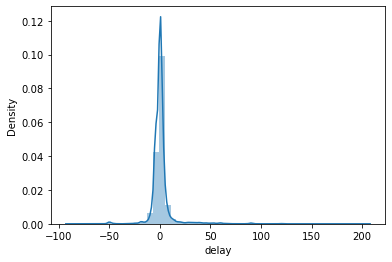

In [77]:
# checking frequency of our target variable
# its showing right skewed
sns.distplot(main_train['delay'])

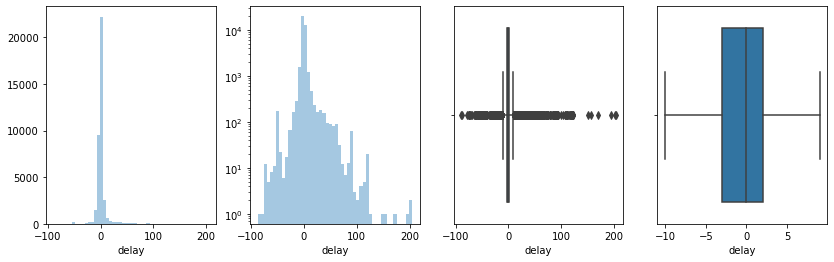

In [78]:
# boxplot analysis
delay, axs = plt.subplots(ncols = 4, figsize=(14, 4))

sns.distplot(main_train.delay.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(main_train.delay.dropna()[main_train.delay > -89], kde=False, ax=axs[1])
sns.boxplot(main_train.delay, ax=axs[2])
sns.boxplot(main_train.delay, ax=axs[3],showfliers=False)

second_plt.set_yscale('log')

as we saw above for the delay variable there were so many outliers and if we remove them then we will be left with very few data so therefore,we'll not remove any outliers in the delay column and continue to work with the data set sns

In [79]:
# binarization
main_train['high_low']=np.where(main_train['delay']>100,1,0)

<AxesSubplot:xlabel='delay', ylabel='Density'>

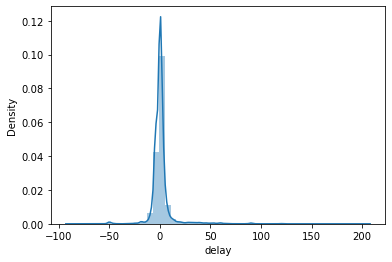

In [80]:
sns.distplot(main_train['delay'])

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

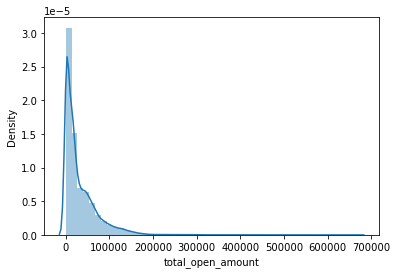

In [81]:
# frequency check for total_open_amount
sns.distplot(main_train.total_open_amount)

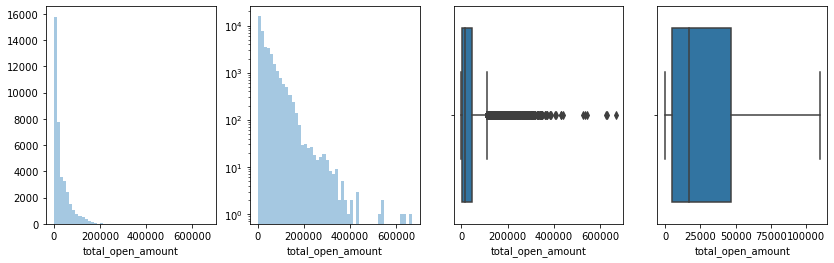

In [82]:
# boxplot analysis and distribution check 
doc_id, axs = plt.subplots(ncols = 4, figsize=(14, 4))

sns.distplot(main_train.total_open_amount.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(main_train.total_open_amount.dropna()[main_train.total_open_amount > 0], kde=False, ax=axs[1])
sns.boxplot(main_train.total_open_amount, ax=axs[2])
sns.boxplot(main_train.total_open_amount, ax=axs[3],showfliers=False)

second_plt.set_yscale('log')

since there are too many outlier values in total_open_amount,we cannot remove it as it will reduce the training space and shape


In [83]:
main_train.shape

(38319, 13)

# Date-time variable

<AxesSubplot:xlabel='due_in_date', ylabel='Density'>

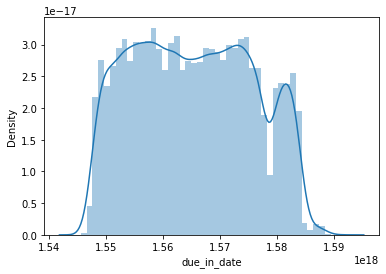

In [84]:
# its showing normal skew
sns.distplot(main_train['due_in_date'])

<AxesSubplot:xlabel='clear_date', ylabel='Density'>

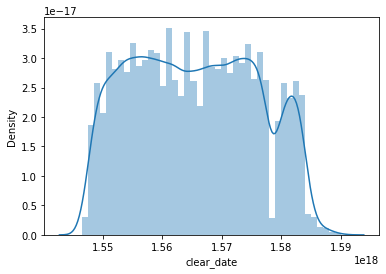

In [85]:
sns.distplot(main_train['clear_date'])

# Categorical Variable

<AxesSubplot:xlabel='business_code', ylabel='count'>

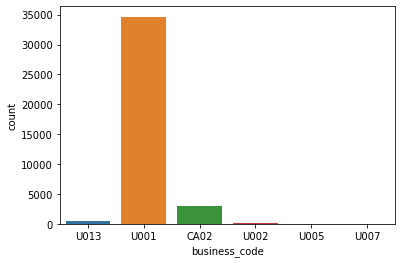

In [86]:
# checking balance of our business_code column
sns.countplot(main_train['business_code'])

<AxesSubplot:xlabel='cust_payment_terms', ylabel='count'>

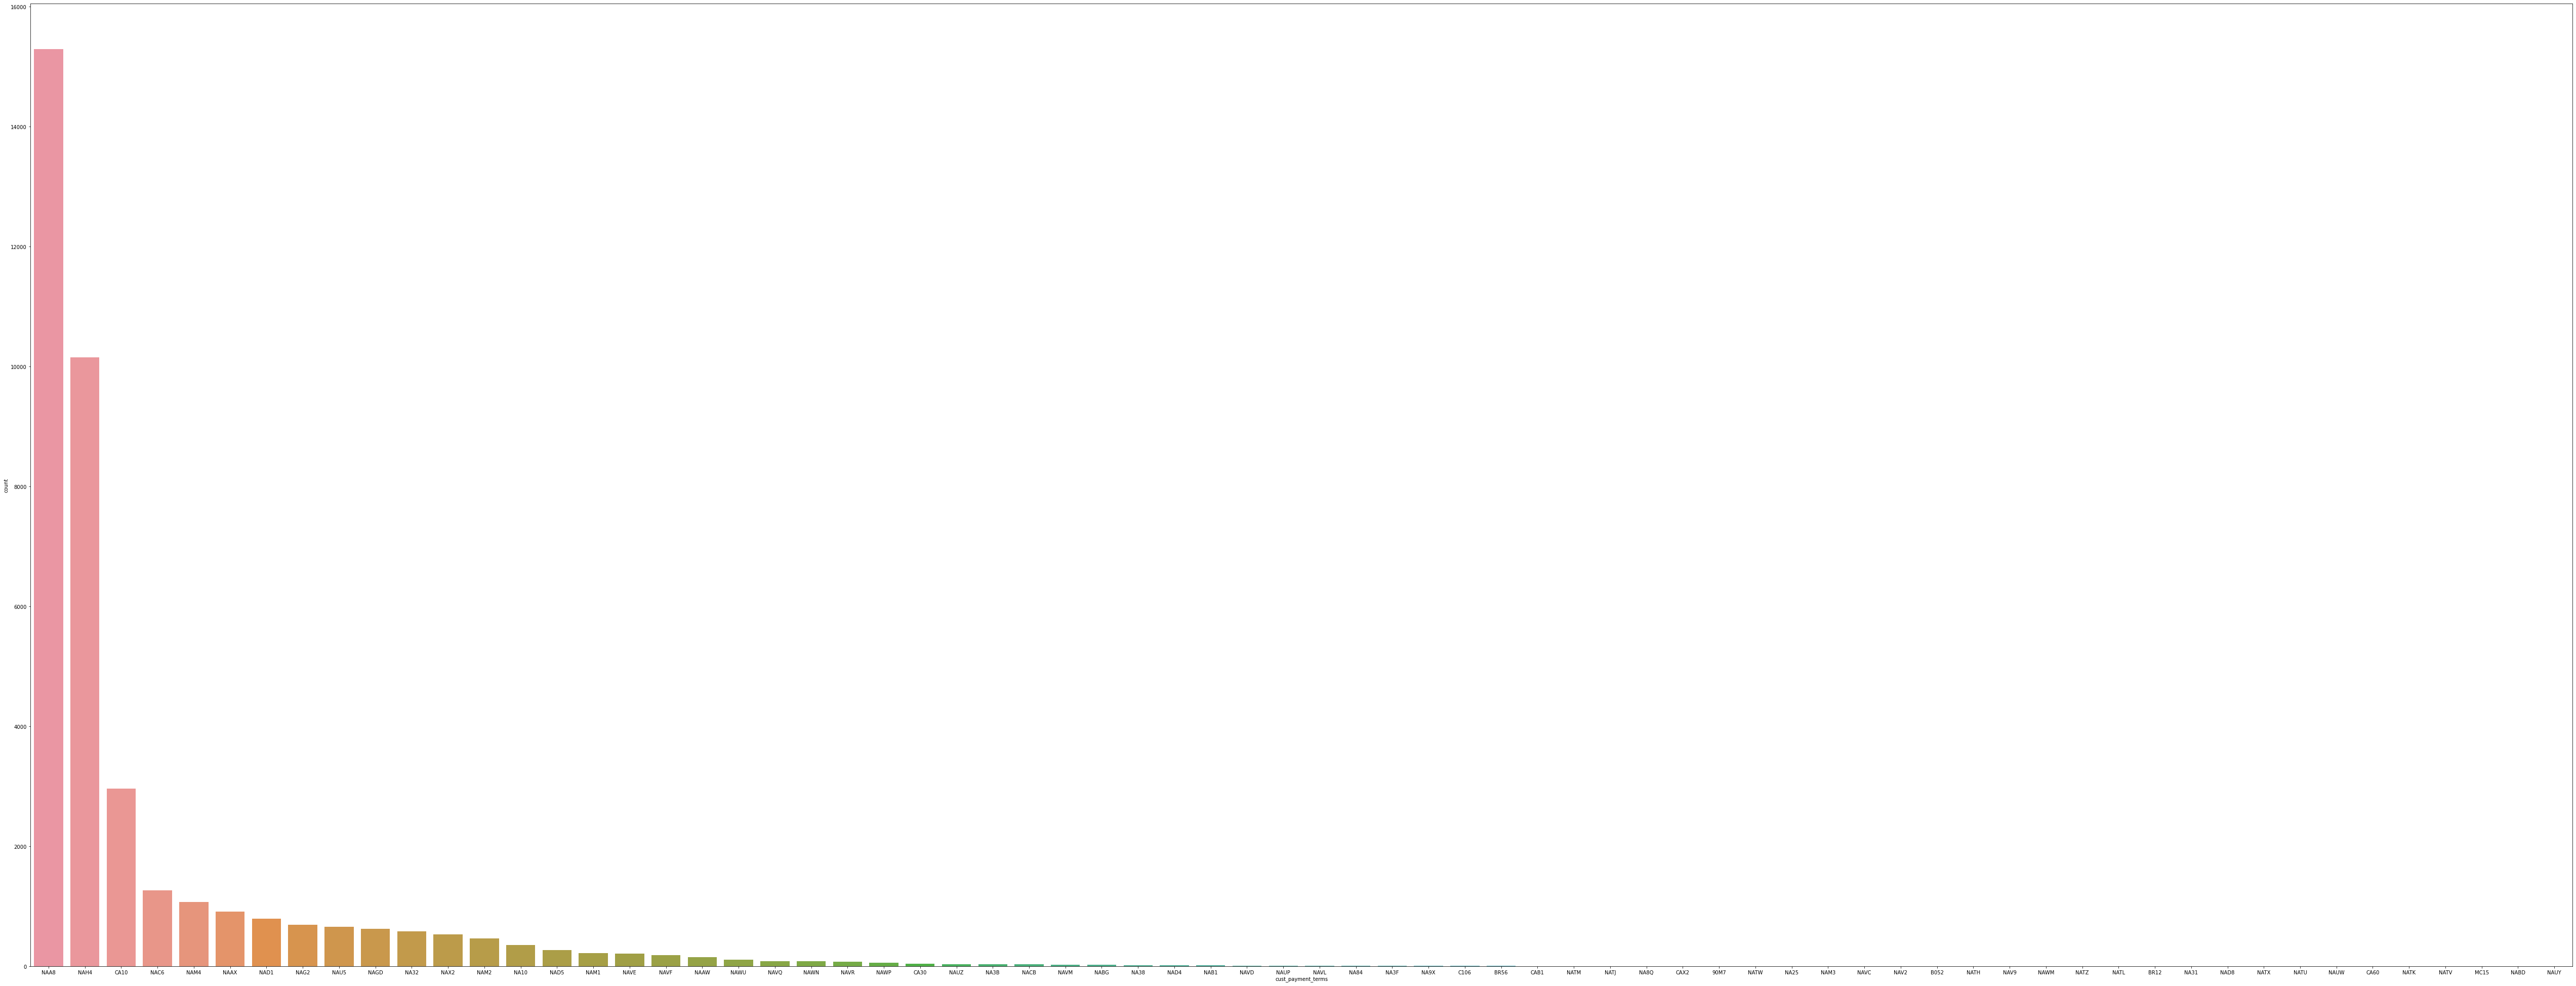

In [87]:
# checking balance
plt.figure(figsize=(90,35))
sns.countplot(main_train['cust_payment_terms'].dropna(),order=main_train['cust_payment_terms'].value_counts().index)

# Multivariate Analysis

In [88]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38319 entries, 10052 to 11541
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         38319 non-null  object        
 1   cust_number           38319 non-null  object        
 2   name_customer         38319 non-null  object        
 3   clear_date            38319 non-null  datetime64[ns]
 4   doc_id                38319 non-null  float64       
 5   posting_date          38319 non-null  datetime64[ns]
 6   document_create_date  38319 non-null  datetime64[ns]
 7   due_in_date           38319 non-null  datetime64[ns]
 8   invoice_currency      38319 non-null  object        
 9   total_open_amount     38319 non-null  float64       
 10  cust_payment_terms    38319 non-null  object        
 11  delay                 38319 non-null  int64         
 12  high_low              38319 non-null  int32         
dtypes: datetime6

In [89]:
# label encoding cust_number as it contains some mixed datatype values
cust_number_encoder=LabelEncoder()
main_train['cust_number_en'] = cust_number_encoder.fit_transform(main_train['cust_number'])

In [90]:
# dropping cust_number
main_train=main_train.drop(columns='cust_number')

In [91]:
# calculating count of unique cust_payment_terms
main_train['cust_payment_terms'].nunique()

70

In [92]:
# # calculating count of unique cust_number_en
main_train['cust_number_en'].nunique()

1334

In [93]:
# grouping into dataset into cust_number_en
groupby=main_train.groupby('cust_number_en')

<AxesSubplot:xlabel='cust_number_en', ylabel='delay'>

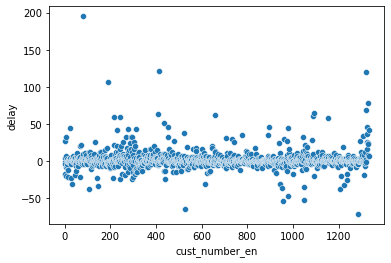

In [94]:
# plot between mean of cust_number_en and delay
sns.scatterplot(data=groupby.mean(), x="cust_number_en", y="delay")

In [95]:
# grouping into cust_payment_terms
groupby=main_train.groupby('cust_payment_terms')

<AxesSubplot:xlabel='cust_payment_terms', ylabel='delay'>

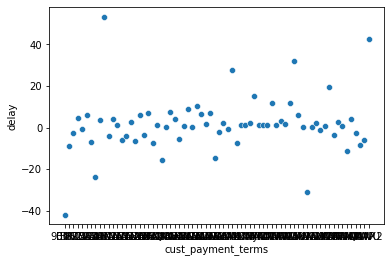

In [96]:
# plot between mean of cust_payment_terms
sns.scatterplot(data=groupby.mean(), x="cust_payment_terms", y="delay")

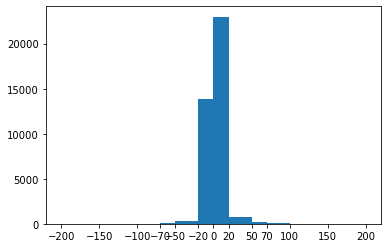

In [97]:
#Delay in payment for invoice 
bins_ranges= [-200,-150,-100,-70,-50,-20,0,20,50,70,100,150,200]
bins_name=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.hist(main_train['delay'],bins=bins_ranges)
plt.xticks(bins_ranges)
plt.show()

In [98]:
main_train['delay_bin_label'] = pd.cut( np.array(main_train['delay']), bins=bins_ranges,labels=bins_name)

In [99]:
main_train['delay_bin_label']=main_train['delay_bin_label'].astype(float)

In [100]:
main_train=main_train.dropna(subset=['delay_bin_label'])

In [101]:
main_train

,business_code,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,delay,high_low,cust_number_en,delay_bin_label
10052,U013,PARAM corp,2019-01-23,1.991819e+09,2018-12-30,2018-12-26,2019-01-29,USD,13760.55,NAVE,-6,0,335,6.0
20128,U013,SYSCO IN trust,2019-02-28,1.991820e+09,2018-12-30,2018-12-28,2019-01-29,USD,28225.48,NAVE,30,0,33,8.0
39996,U001,AM associates,2019-01-18,1.928533e+09,2019-01-02,2018-12-29,2019-01-17,USD,2241.95,NAA8,1,0,584,7.0
7488,U001,WAL-MAR associates,2019-01-10,1.928538e+09,2018-12-31,2018-12-29,2019-01-15,USD,72795.86,NAH4,-5,0,843,6.0
48624,U001,WAL-MAR in,2019-01-10,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,72181.59,NAH4,-4,0,843,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24670,U001,KROGE,2020-03-12,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,USD,14162.90,NAA8,0,0,858,6.0
13748,U001,KROGER us,2020-03-16,1.930576e+09,2020-02-26,2020-02-27,2020-03-12,USD,70898.33,NAA8,4,0,912,7.0
17190,U001,WAL-MAR trust,2020-03-10,1.930576e+09,2020-02-26,2020-02-27,2020-03-12,USD,5126.33,NAH4,-2,0,843,6.0
4881,U001,WAL-MAR,2020-03-09,1.930576e+09,2020-02-26,2020-02-27,2020-03-12,USD,3471.68,NAH4,-3,0,843,6.0


In [102]:
# correlation matrix
corrmat=main_train.corr()
corrmat

,doc_id,total_open_amount,delay,high_low,cust_number_en,delay_bin_label
doc_id,1.000000,0.172320,0.146384,0.033215,-0.426097,0.181886
total_open_amount,0.172320,1.000000,0.008707,-0.017970,-0.080818,0.020147
delay,0.146384,0.008707,1.000000,0.343817,0.094497,0.799988
high_low,0.033215,-0.017970,0.343817,1.000000,-0.017030,0.219877
cust_number_en,-0.426097,-0.080818,0.094497,-0.017030,1.000000,0.022943
delay_bin_label,0.181886,0.020147,0.799988,0.219877,0.022943,1.000000


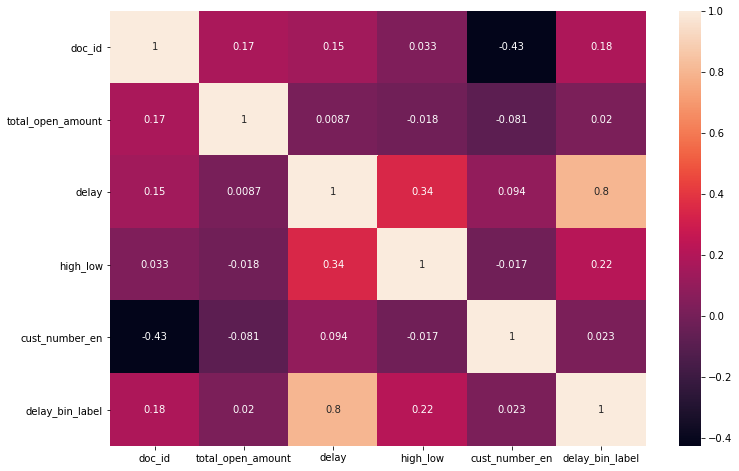

In [103]:
plt.figure(figsize=(12, 8))

main_corr = main_train.corr()
sns.heatmap(main_corr, 
            xticklabels = main_corr.columns.values,
            yticklabels = main_corr.columns.values,
            annot = True);

In [104]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [105]:
mosthighlycorrelated(main_train, 7)

,FirstVariable,SecondVariable,Correlation
0,delay,delay_bin_label,0.799988
1,doc_id,cust_number_en,-0.426097
2,delay,high_low,0.343817
3,high_low,delay_bin_label,0.219877
4,doc_id,delay_bin_label,0.181886
5,doc_id,total_open_amount,0.172320
6,doc_id,delay,0.146384


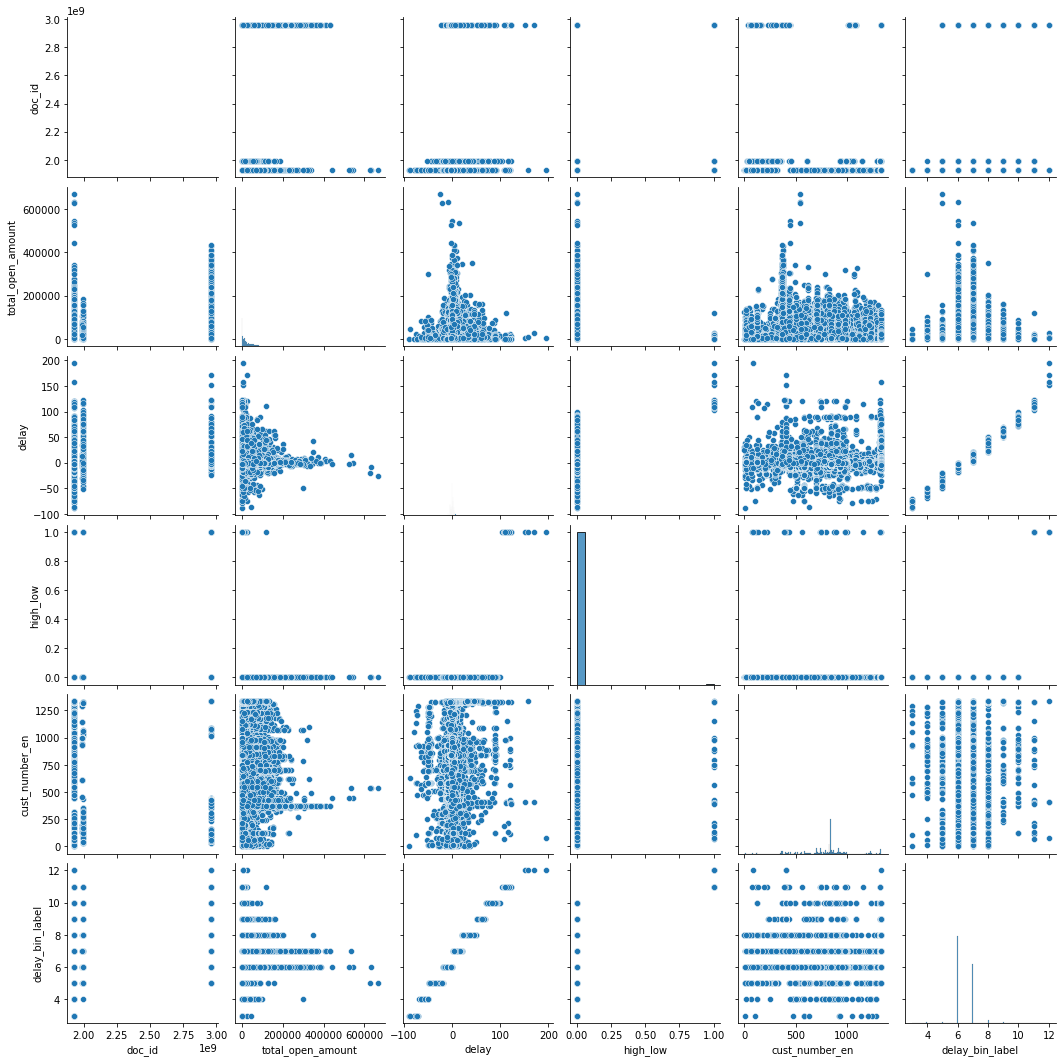

In [106]:
sns.pairplot(main_train)

# summary statistics for multivariate data

In [107]:
main_train.describe()

,doc_id,total_open_amount,delay,high_low,cust_number_en,delay_bin_label
count,3.831700e+04,38317.000000,38317.000000,38317.000000,38317.000000,38317.000000
mean,2.012876e+09,32062.430126,0.814808,0.000913,774.267297,6.449148
std,2.792528e+08,39654.166165,10.718036,0.030210,245.656186,0.641546
min,1.928502e+09,0.790000,-89.000000,0.000000,0.000000,3.000000
25%,1.929181e+09,4662.920000,-3.000000,0.000000,698.000000,6.000000
50%,1.929734e+09,17197.080000,0.000000,0.000000,842.000000,6.000000
75%,1.930210e+09,46545.140000,2.000000,0.000000,850.000000,7.000000
max,2.960617e+09,668593.360000,195.000000,1.000000,1333.000000,12.000000


# Mean and Variances per group

In [108]:
# grouping of mean and std() by cutomer_number group
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [109]:
printMeanAndSdByGroup(main_train['delay'],main_train['cust_number_en'])

## Means:


cust_number_en
0       27.500000
1      -17.666667
2        4.200000
3       -1.000000
4       -3.913043
          ...    
1329    23.750000
1330     7.245327
1331     8.487179
1332     6.486957
1333    41.654580
Name: delay, Length: 1334, dtype: float64


## Standard deviations:


cust_number_en
0        2.500000
1       13.299958
2       47.372566
3        0.000000
4        5.081193
          ...    
1329    13.663363
1330    10.742226
1331     9.569910
1332    10.360766
1333    10.975204
Name: delay, Length: 1334, dtype: float64


## Sample sizes:


,delay
cust_number_en,
0,2
1,3
2,5
3,1
4,23
...,...
1329,4
1330,428
1331,39


# Split into Train,Validation and Test Set

In [110]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function
main_train=main_train.sort_values(by='document_create_date')

# y - contains only the target value 
y = main_train['delay']

# X - contains the dataframe without the target i.e price
X = main_train.drop(['delay'],axis=1)

In [111]:
X_train, X_rem,y_train,y_rem = train_test_split(X,y,test_size=.20,shuffle=False,random_state=42)
X_train.shape,X_rem.shape

((30653, 13), (7664, 13))

In [112]:
X_validation_1, X_validation_2,y_validation_1,y_validation_2 = train_test_split(X_rem,y_rem,test_size=.50,shuffle=False,random_state=42)
X_validation_1.shape,X_validation_2.shape

((3832, 13), (3832, 13))

In [113]:
X_train.shape,X_validation_1.shape,X_validation_2.shape

((30653, 13), (3832, 13), (3832, 13))

# Feature Engineering

In [114]:
X_train.dtypes

business_code                   object
name_customer                   object
clear_date              datetime64[ns]
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
cust_payment_terms              object
high_low                         int32
cust_number_en                   int32
delay_bin_label                float64
dtype: object

# Categorical Column

Label Encoding

In [115]:
#Creating LabelEncoder for business_code column as business_code_label
bussiness_encoder = LabelEncoder()
X_train['business_code_en'] = bussiness_encoder.fit_transform(X_train['business_code'])
X_validation_1['business_code_en'] = bussiness_encoder.transform(X_validation_1['business_code'])
X_validation_2['business_code_en'] = bussiness_encoder.transform(X_validation_2['business_code'])

In [116]:
#drop business_code col from all sets
X_train=X_train.drop(columns='business_code')
X_validation_1=X_validation_1.drop(columns='business_code')
X_validation_2 =X_validation_2.drop(columns='business_code')

In [117]:
#Creating name_customer column as name_customer_en
name_customer_encoder = LabelEncoder()
X_train['name_customer_en'] = name_customer_encoder.fit_transform(X_train['name_customer'])
X_validation_1['name_customer_en'] = name_customer_encoder.fit_transform(X_validation_1['name_customer'])
X_validation_2['name_customer_en'] = name_customer_encoder.fit_transform(X_validation_2['name_customer'])

In [118]:
#drop name_customer col from all sets
X_train=X_train.drop(columns='name_customer')
X_validation_1=X_validation_1.drop(columns='name_customer')
X_validation_2 =X_validation_2.drop(columns='name_customer')

In [119]:
#Checking unique no of cust_payment_terms
X_train['cust_payment_terms'].nunique()

69

In [120]:
#Creating cust_payment_terms column as cust_payment_terms_label
cust_payment_terms_encoder = LabelEncoder()
X_train['cust_payment_terms_en'] = cust_payment_terms_encoder.fit_transform(X_train['cust_payment_terms'])
X_validation_1['cust_payment_terms_en'] = cust_payment_terms_encoder.fit_transform(X_validation_1['cust_payment_terms'])
X_validation_2['cust_payment_terms_en'] = cust_payment_terms_encoder.fit_transform(X_validation_2['cust_payment_terms'])

In [121]:
#drop cust_payment_terms col from all sets
X_train=X_train.drop(columns='cust_payment_terms')
X_validation_1=X_validation_1.drop(columns='cust_payment_terms')
X_validation_2 =X_validation_2.drop(columns='cust_payment_terms')

In [122]:
#Creating invoice_currency column as invoice_currency_label
invoice_currency_encoder = LabelEncoder()
X_train['invoice_currency_en'] = invoice_currency_encoder.fit_transform(X_train['invoice_currency'])
X_validation_1['invoice_currency_en'] = invoice_currency_encoder.fit_transform(X_validation_1['invoice_currency'])
X_validation_2['invoice_currency_en'] = invoice_currency_encoder.fit_transform(X_validation_2['invoice_currency'])

In [123]:
#drop invoice_currency col from all sets
X_train=X_train.drop(columns='invoice_currency')
X_validation_1=X_validation_1.drop(columns='invoice_currency')
X_validation_2 =X_validation_2.drop(columns='invoice_currency')

In [124]:
main_train

,business_code,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,delay,high_low,cust_number_en,delay_bin_label
10052,U013,PARAM corp,2019-01-23,1.991819e+09,2018-12-30,2018-12-26,2019-01-29,USD,13760.55,NAVE,-6,0,335,6.0
20128,U013,SYSCO IN trust,2019-02-28,1.991820e+09,2018-12-30,2018-12-28,2019-01-29,USD,28225.48,NAVE,30,0,33,8.0
15036,U001,BJ'S co,2019-01-15,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,245.30,NAA8,1,0,745,7.0
44502,U001,WAL-MAR trust,2019-01-09,1.928533e+09,2018-12-30,2018-12-29,2019-01-14,USD,2157.78,NAH4,-5,0,843,6.0
15011,U001,RESTAU in,2019-01-15,1.928539e+09,2018-12-31,2018-12-29,2019-01-15,USD,2272.20,NAA8,0,0,952,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,U001,WEIS systems,2020-03-12,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,USD,14880.14,NAA8,0,0,846,6.0
47568,U001,SYSCO in,2020-03-16,1.930576e+09,2020-02-26,2020-02-27,2020-03-12,USD,8452.06,NAA8,4,0,720,7.0
4881,U001,WAL-MAR,2020-03-09,1.930576e+09,2020-02-26,2020-02-27,2020-03-12,USD,3471.68,NAH4,-3,0,843,6.0
24817,CA02,WAL-M llc,2020-03-20,2.960617e+09,2020-02-26,2020-02-27,2020-03-15,CAD,4153.10,CA10,5,0,430,7.0


# Date-Time Columns

In [125]:
#extract day,month and year 
X_train['weekday_of_due'] = X_train['due_in_date'].dt.dayofweek
X_validation_1['weekday_of_due'] = X_validation_1['due_in_date'].dt.dayofweek
X_validation_2['weekday_of_due'] = X_validation_2['due_in_date'].dt.dayofweek

X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_validation_1['day_of_due'] = X_validation_1['due_in_date'].dt.day
X_validation_1['month_of_due'] = X_validation_1['due_in_date'].dt.month
X_validation_1['year_of_due'] = X_validation_1['due_in_date'].dt.year

X_validation_2['day_of_due'] = X_validation_2['due_in_date'].dt.day
X_validation_2['month_of_due'] = X_validation_2['due_in_date'].dt.month
X_validation_2['year_of_due'] = X_validation_2['due_in_date'].dt.year

In [126]:
#drop due_in_date col from all sets
X_train=X_train.drop(columns='due_in_date')
X_validation_1=X_validation_1.drop(columns='due_in_date')
X_validation_2 =X_validation_2.drop(columns='due_in_date')

In [127]:
#extract day,month and year 
X_train['weekday_of_posting_date'] = X_train['posting_date'].dt.dayofweek
X_validation_1['weekday_of_posting_date'] = X_validation_1['posting_date'].dt.dayofweek
X_validation_2['weekday_of_posting_date'] = X_validation_2['posting_date'].dt.dayofweek

X_train['day_of_posting_date'] = X_train['posting_date'].dt.day
X_train['month_of_posting_date'] = X_train['posting_date'].dt.month
X_train['year_of_posting_date'] = X_train['posting_date'].dt.year

X_validation_1['day_of_posting_date'] = X_validation_1['posting_date'].dt.day
X_validation_1['month_of_posting_date'] = X_validation_1['posting_date'].dt.month
X_validation_1['year_of_posting_date'] = X_validation_1['posting_date'].dt.year


X_validation_2['day_of_posting_date'] = X_validation_2['posting_date'].dt.day
X_validation_2['month_of_posting_date'] = X_validation_2['posting_date'].dt.month
X_validation_2['year_of_posting_date'] = X_validation_2['posting_date'].dt.year

In [128]:
#drop posting_date col from all sets
X_train=X_train.drop(columns='posting_date')
X_validation_1=X_validation_1.drop(columns='posting_date')
X_validation_2 =X_validation_2.drop(columns='posting_date')

In [129]:
#extract day,month and year from document_create_date
X_train['weekday_of_document_create_date'] = X_train['document_create_date'].dt.dayofweek
X_validation_1['weekday_of_document_create_date'] = X_validation_1['document_create_date'].dt.dayofweek
X_validation_2['weekday_of_document_create_date'] = X_validation_2['document_create_date'].dt.dayofweek

X_train['day_of_document_create_date'] = X_train['document_create_date'].dt.day
X_train['month_of_document_create_date'] = X_train['document_create_date'].dt.month
X_train['year_of_document_create_date'] = X_train['document_create_date'].dt.year

X_validation_1['day_of_document_create_date'] = X_validation_1['document_create_date'].dt.day
X_validation_1['month_of_document_create_date'] = X_validation_1['document_create_date'].dt.month
X_validation_1['year_of_document_create_date'] = X_validation_1['document_create_date'].dt.year


X_validation_2['day_of_document_create_date'] = X_validation_2['document_create_date'].dt.day
X_validation_2['month_of_document_create_date'] = X_validation_2['document_create_date'].dt.month
X_validation_2['year_of_document_create_date'] = X_validation_2['document_create_date'].dt.year

In [130]:
#drop document_create_date col from all sets
X_train=X_train.drop(columns='document_create_date')
X_validation_1=X_validation_1.drop(columns='document_create_date')
X_validation_2 =X_validation_2.drop(columns='document_create_date')

In [131]:
# extract date,month and year
X_train['clearing_weekday']=X_train['clear_date'].dt.dayofweek
X_validation_1['clearing_weekday']=X_validation_1['clear_date'].dt.dayofweek
X_validation_2['clearing_weekday']=X_validation_2['clear_date'].dt.dayofweek

X_train['clearing_date'] = X_train['clear_date'].dt.day
X_train['clearing_month'] = X_train['clear_date'].dt.month
X_train['clearing_year'] = X_train['clear_date'].dt.year

X_validation_1['clearing_date'] = X_validation_1['clear_date'].dt.day
X_validation_1['clearing_month'] = X_validation_1['clear_date'].dt.month
X_validation_1['clearing_year'] = X_validation_1['clear_date'].dt.year

X_validation_2['clearing_date'] = X_validation_2['clear_date'].dt.day
X_validation_2['clearing_month'] = X_validation_2['clear_date'].dt.month
X_validation_2['clearing_year'] = X_validation_2['clear_date'].dt.year

In [132]:
#drop clear_date col from all sets
X_train=X_train.drop(columns='clear_date')
X_validation_1=X_validation_1.drop(columns='clear_date')
X_validation_2 =X_validation_2.drop(columns='clear_date')

In [133]:
X_train

,doc_id,total_open_amount,high_low,cust_number_en,delay_bin_label,business_code_en,name_customer_en,cust_payment_terms_en,invoice_currency_en,weekday_of_due,...,month_of_posting_date,year_of_posting_date,weekday_of_document_create_date,day_of_document_create_date,month_of_document_create_date,year_of_document_create_date,clearing_weekday,clearing_date,clearing_month,clearing_year
10052,1.991819e+09,13760.55,0,335,6.0,5,2334,58,1,1,...,12,2018,2,26,12,2018,2,23,1,2019
20128,1.991820e+09,28225.48,0,33,8.0,5,3113,58,1,1,...,12,2018,4,28,12,2018,3,28,2,2019
15036,1.928538e+09,245.30,0,745,7.0,1,352,21,1,0,...,12,2018,5,29,12,2018,1,15,1,2019
44502,1.928533e+09,2157.78,0,843,6.0,1,3385,35,1,0,...,12,2018,5,29,12,2018,2,9,1,2019
15011,1.928539e+09,2272.20,0,952,6.0,1,2627,21,1,1,...,12,2018,5,29,12,2018,1,15,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7072,1.930165e+09,2082.04,0,126,7.0,1,833,21,1,2,...,11,2019,0,18,11,2019,4,6,12,2019
32843,1.930166e+09,8649.76,0,876,7.0,1,3057,21,1,1,...,11,2019,0,18,11,2019,0,9,12,2019
8932,1.930166e+09,23201.52,0,720,7.0,1,3074,21,1,3,...,11,2019,0,18,11,2019,2,11,12,2019
23354,1.930166e+09,15780.26,0,959,6.0,1,89,21,1,2,...,11,2019,0,18,11,2019,2,4,12,2019


# Feature Selection using:

# Filter Mehtod

In [134]:
#code for removing constant features

constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_validation_1.drop(labels=constant_features, axis=1, inplace=True)
X_validation_2.drop(labels=constant_features, axis=1, inplace=True)
X_train.shape, X_validation_1.shape,X_validation_2.shape

((30653, 24), (3832, 24), (3832, 24))

In [135]:
X_train

,doc_id,total_open_amount,high_low,cust_number_en,delay_bin_label,business_code_en,name_customer_en,cust_payment_terms_en,invoice_currency_en,weekday_of_due,...,day_of_posting_date,month_of_posting_date,year_of_posting_date,weekday_of_document_create_date,day_of_document_create_date,month_of_document_create_date,year_of_document_create_date,clearing_weekday,clearing_date,clearing_month
10052,1.991819e+09,13760.55,0,335,6.0,5,2334,58,1,1,...,30,12,2018,2,26,12,2018,2,23,1
20128,1.991820e+09,28225.48,0,33,8.0,5,3113,58,1,1,...,30,12,2018,4,28,12,2018,3,28,2
15036,1.928538e+09,245.30,0,745,7.0,1,352,21,1,0,...,30,12,2018,5,29,12,2018,1,15,1
44502,1.928533e+09,2157.78,0,843,6.0,1,3385,35,1,0,...,30,12,2018,5,29,12,2018,2,9,1
15011,1.928539e+09,2272.20,0,952,6.0,1,2627,21,1,1,...,31,12,2018,5,29,12,2018,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7072,1.930165e+09,2082.04,0,126,7.0,1,833,21,1,2,...,19,11,2019,0,18,11,2019,4,6,12
32843,1.930166e+09,8649.76,0,876,7.0,1,3057,21,1,1,...,18,11,2019,0,18,11,2019,0,9,12
8932,1.930166e+09,23201.52,0,720,7.0,1,3074,21,1,3,...,20,11,2019,0,18,11,2019,2,11,12
23354,1.930166e+09,15780.26,0,959,6.0,1,89,21,1,2,...,19,11,2019,0,18,11,2019,2,4,12


In [136]:
# # percentage of observations showing each of the different values
X_train['invoice_currency_en'].value_counts() / np.float(len(X_train))

1    0.918833
0    0.081167
Name: invoice_currency_en, dtype: float64

In [137]:
# as invoice_currency_en its showing 99% values as 1 and 1% value as 0
# we can simply drop it taking in mind it will reduce complexity of our model
#drop invoice_currency_en col from all sets
X_train=X_train.drop(columns='invoice_currency_en')
X_validation_1=X_validation_1.drop(columns='invoice_currency_en')
X_validation_2 =X_validation_2.drop(columns='invoice_currency_en')
X_train.shape, X_validation_1.shape,X_validation_2.shape

((30653, 23), (3832, 23), (3832, 23))

# Correlation

<AxesSubplot:title={'center':'Correlation of Features'}>

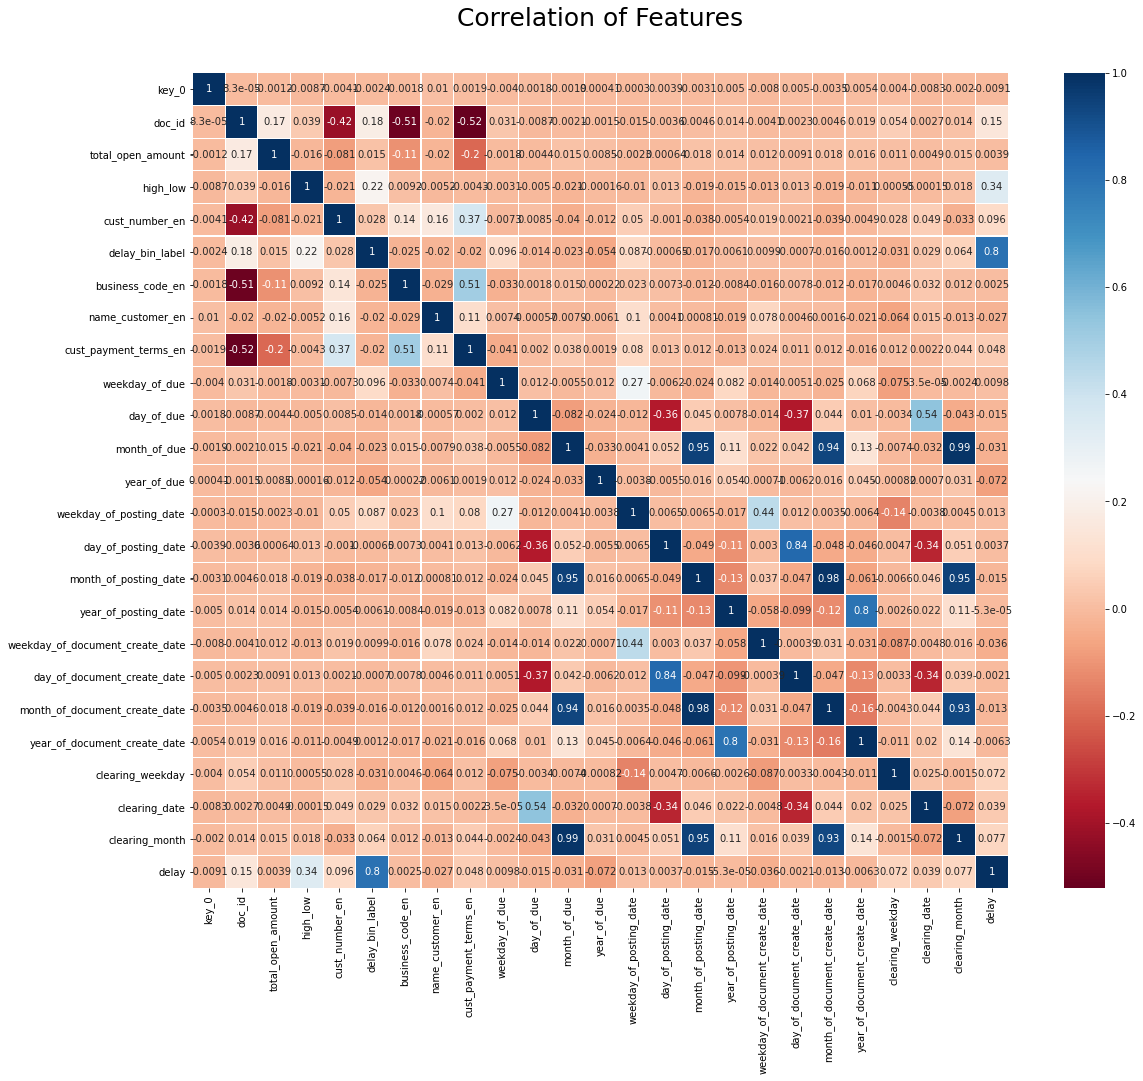

In [138]:
#Correlation graph
colormap = plt.cm.RdBu
plt.figure(figsize=(20,15))
plt.title('Correlation of Features', y=1.05, size=25)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [139]:
# as we can see business_code_en correlation with delay is very less so we can drop this feature 
# drop
X_train=X_train.drop(columns='business_code_en')
X_validation_1=X_validation_1.drop(columns='business_code_en')
X_validation_2=X_validation_2.drop(columns='business_code_en')

# ID columns and Date columns

In [140]:
# drop doc_id
X_train=X_train.drop(columns='doc_id')
X_validation_1=X_validation_1.drop(columns='doc_id')
X_validation_2=X_validation_2.drop(columns='doc_id')

In [141]:
X_train.shape,X_validation_1.shape,X_validation_2.shape

((30653, 21), (3832, 21), (3832, 21))

# Covariance

<AxesSubplot:title={'center':'Covariance of Features'}>

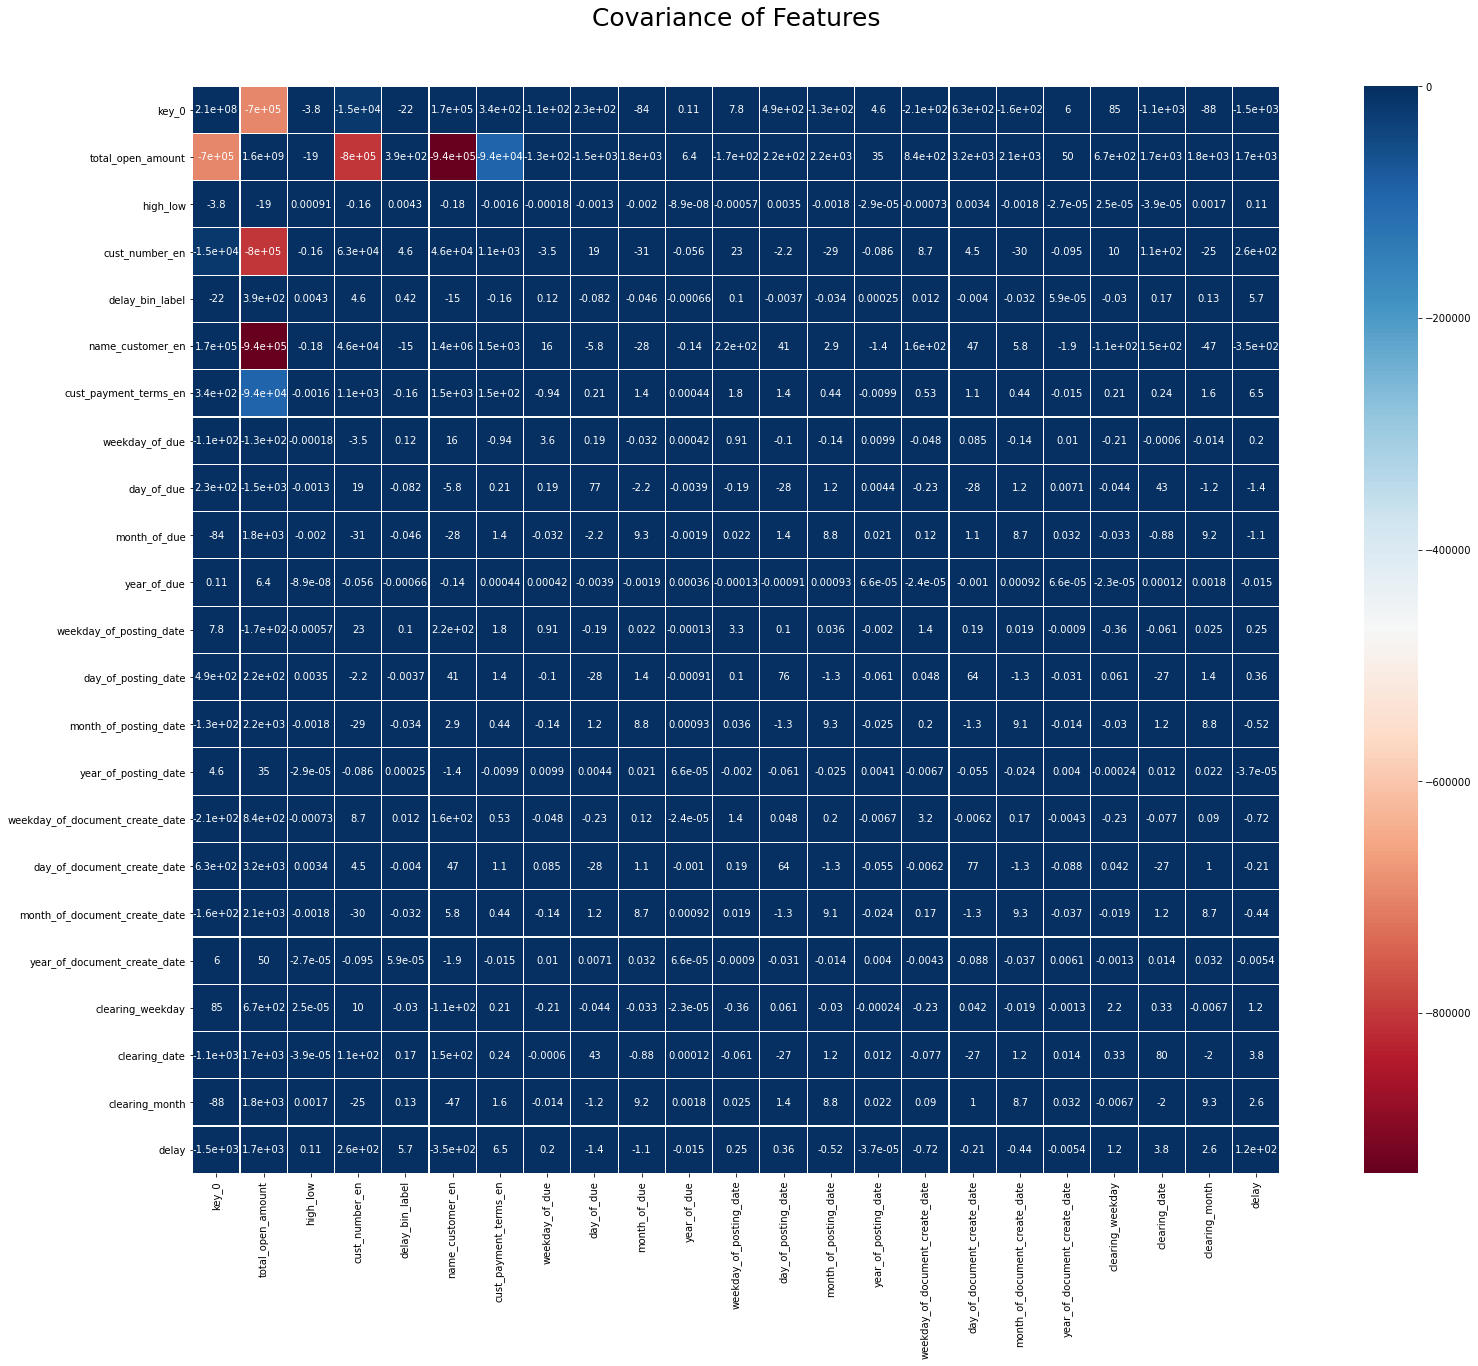

In [142]:
colormap = plt.cm.RdBu
plt.figure(figsize=(30,20))
plt.title('Covariance of Features', y=1.05, size=25)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).cov(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [143]:
X_train.dtypes

total_open_amount                  float64
high_low                             int32
cust_number_en                       int32
delay_bin_label                    float64
name_customer_en                     int32
cust_payment_terms_en                int32
weekday_of_due                       int64
day_of_due                           int64
month_of_due                         int64
year_of_due                          int64
weekday_of_posting_date              int64
day_of_posting_date                  int64
month_of_posting_date                int64
year_of_posting_date                 int64
weekday_of_document_create_date      int64
day_of_document_create_date          int64
month_of_document_create_date        int64
year_of_document_create_date         int64
clearing_weekday                     int64
clearing_date                        int64
clearing_month                       int64
dtype: object

# LinearRegression Model

In [144]:
#Library for Linear Regression
base_model = LinearRegression()

In [145]:
#fitting model on train_Set 
base_model.fit(X_train,y_train)

LinearRegression()

In [146]:
#y_predict containing the predicted data on validation set
y_predict = base_model.predict(X_validation_1)

In [147]:
#Library for checking MSE(mean_squared_error)
#Checking MSE on predicted model with that of actual mode
mean_squared_error(y_validation_1,y_predict, squared=False)

208.2681517364766

In [148]:
math.sqrt(mean_squared_error(y_validation_1,y_predict, squared=False))

14.43149859635085

In [149]:
#Storing predicted and actual delay in met variable
met1 = pd.DataFrame(zip(y_predict , y_validation_1),columns=['Predicted_delay','Actual_delay'])

In [150]:
met1.sample(50)

,Predicted_delay,Actual_delay
1343,-1.992273,-2
3010,-362.500642,2
3515,-320.186912,45
3134,-362.469701,2
1383,0.001351,0
1529,-1.012224,-1
3013,-361.497949,3
2057,1.019617,1
3621,-365.512581,-1
2287,1.062379,1


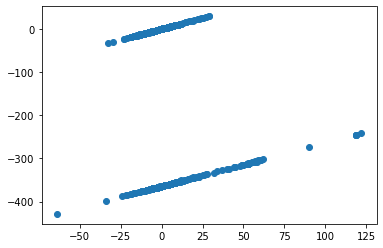

In [151]:
plt.scatter(y_validation_1, y_predict)

In [152]:
#Predicting model on test_set of data
y_predict_test = base_model.predict(X_validation_2)

In [153]:
#Library for checking MSE(mean_squared_error)
#Checking MSE on predicted model with that of actual mode
mean_squared_error(y_validation_2,y_predict_test, squared=False)

364.48746804680246

In [154]:
math.sqrt(mean_squared_error(y_validation_2,y_predict_test, squared=False))

19.091554888138432

In [155]:
#Storing it on met2 variable
met2 = pd.DataFrame(zip(y_predict_test , y_validation_2),columns=['Predicted_delay','Actual_delay'])
met2

,Predicted_delay,Actual_delay
0,-326.141604,39
1,-363.488137,1
2,-369.515652,-5
3,-351.526163,13
4,-363.494357,1
...,...,...
3827,-364.515942,0
3828,-360.478527,4
3829,-367.498634,-3
3830,-359.486211,5


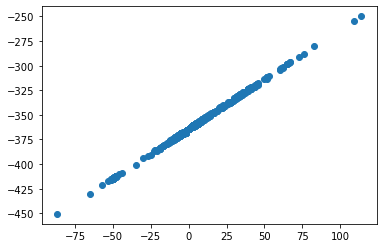

In [156]:
plt.scatter(y_validation_2, y_predict_test)

# Random Forest Regression

In [157]:
# function for random forest
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

In [158]:
#fitting train_set on model
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [159]:
# y_pred contains the predicted data from validation set
y_pred = regressor.predict(X_validation_1)

In [160]:
#Checking accuracy
mean_squared_error(y_validation_1, y_pred, squared=False)

4.5570895866818155

In [161]:
#Checking accuracy
math.sqrt(mean_squared_error(y_validation_1,y_pred, squared=False))

2.1347340786809528

In [162]:
#Storing predicted and actual delay in met variable
met_1 = pd.DataFrame(zip(y_pred , y_validation_1),columns=['Predicted_delay','Actual_delay'])

In [163]:
met_1.sample(50)

,Predicted_delay,Actual_delay
932,-1.70,-3
1997,4.85,5
662,5.85,2
316,-9.20,-1
3658,5.00,3
2724,5.85,14
3552,4.90,2
696,3.50,2
1751,-6.15,-8
3092,-5.60,-5


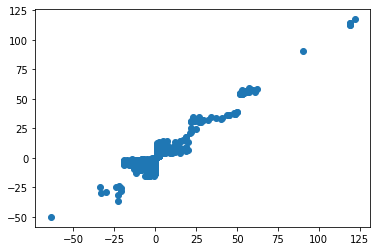

In [164]:
plt.scatter(y_validation_1, y_pred)

In [165]:
# y_pred_ contains the predicted data from validation set
y_pred_ = regressor.predict(X_validation_2)

In [166]:
#Checking accuracy
mean_squared_error(y_validation_2, y_pred_, squared=False)

4.116821778426119

In [167]:
#Checking accuracy
math.sqrt(mean_squared_error(y_validation_2, y_pred_, squared=False))

2.0289952632833126

In [168]:
#Storing predicted and actual delay in met variable
met_2 = pd.DataFrame(zip(y_pred_ , y_validation_2),columns=['Predicted_delay','Actual_delay'])

In [169]:
met_2.sample(50)

,Predicted_delay,Actual_delay
2765,-7.70,-8
1956,1.70,1
1392,5.00,3
1344,-5.70,0
1039,-1.75,-2
1977,5.95,1
1816,4.45,1
1497,2.35,2
2365,-2.05,-1
1646,1.00,1


<AxesSubplot:xlabel='delay'>

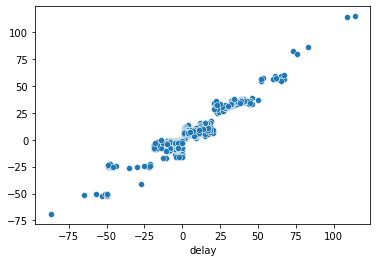

In [170]:
sns.scatterplot(y_validation_2, y_pred_)

# XGBOOST MODEL

In [171]:
# function for Xgbregressor
model = XGBRegressor()

In [172]:
# fitting train_set on our model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [173]:
# Predict the model
pred = model.predict(X_validation_1)

In [174]:
#Checking accuracy
mean_squared_error(y_validation_1, pred, squared=False)

3.6131210963672733

In [175]:
# rmse value
math.sqrt(mean_squared_error(y_validation_1, pred, squared=False))

1.9008211636993295

In [176]:
#Storing predicted and actual delay in met variable
met__1 = pd.DataFrame(zip(pred, y_validation_1),columns=['Predicted_delay','Actual_delay'])

In [177]:
met__1.sample(50)

,Predicted_delay,Actual_delay
589,24.374289,23
1333,8.105622,4
2928,-0.882975,-2
1289,-3.800122,-3
715,-0.765926,0
3520,-3.326506,0
2217,-1.646910,-1
757,-13.887598,-11
1673,-6.984195,-5
3702,-2.171154,0


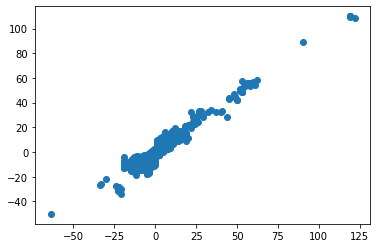

In [178]:
plt.scatter(y_validation_1, pred)

In [179]:
# Predict the model
pred_ = model.predict(X_validation_2)

In [180]:
#Checking accuracy
mean_squared_error(y_validation_2, pred_, squared=False)

3.507314701375178

In [181]:
# rmse value
math.sqrt(mean_squared_error(y_validation_2, pred_, squared=False))

1.8727826092142084

In [182]:
#Storing predicted and actual delay in met variable
met__2 = pd.DataFrame(zip(pred_, y_validation_2),columns=['Predicted_delay','Actual_delay'])

In [183]:
met__2.sample(50)

,Predicted_delay,Actual_delay
1357,0.112784,2
254,2.897233,4
3359,-6.398932,-3
3170,0.448117,1
1419,8.499612,11
1651,0.190341,1
343,-2.200405,0
2240,-4.491580,0
2632,-5.273896,-1
2526,10.094614,13


<AxesSubplot:xlabel='delay'>

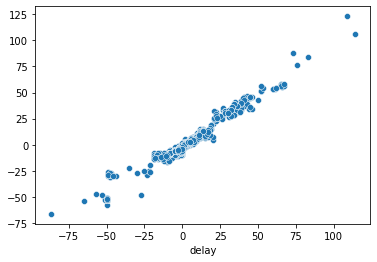

In [184]:
sns.scatterplot(y_validation_2,pred_)

In [190]:
accuracy = model.score(X_train,y_train)

In [191]:
accuracy*100

99.72477489099121